### Imports

In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
# setting some options of pandas

pd.set_option('display.max_colwidth', 260)
pd.set_option('display.max_rows', 10)

### Loading in Dataset

In [4]:
data = pd.read_csv('D:/BE_Project/Data_json_csv/News/Lp_Unix_30_oct_news.csv', encoding = "utf-8")
print(data.shape)
data.head()


(1772, 17)


,Unnamed: 0,Sr,author,timestamp,title,text,Label (-2 to 2),spam_score,performance_score,facebook_likes,facebook_comments,facebook_shares,preprocess,stem,lem,cap,UnixTime
0,0,1,Bloomberg News,2018-10-30 0:00:00,Pot entrepreneurs target Asian money at Hong Kong investor forum - BNN Bloomberg,Seven years. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s how much jail time you can get just for smoking marijuana in Hong Kong. But that doesnÃƒÂ¢Ã‚Â€Ã‚Â™t mean you canÃƒÂ¢Ã‚Â€Ã‚Â™t invest in it.\n\n\nThatÃƒÂ¢Ã‚Â€Ã‚Â™s the message from executives at some of the worldÃƒÂ¢Ã‚Â€Ã‚Â™s ...,0.0,0.733,0.0,0.0,0.0,0.0,"Seven years. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s much jail time get smoking marijuana Hong Kong. But doesnÃƒÂ¢Ã‚Â€Ã‚Â™t mean canÃƒÂ¢Ã‚Â€Ã‚Â™t invest it. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s message executives worldÃƒÂ¢Ã‚Â€Ã‚Â™s hottest cannabis firms, gathering tomorrow cityÃƒÂ¢Ã‚Â€Ã‚Â™s five...","seven years. thatÃƒÂ¢Ã‚Â€Ã‚Â™ much jail time get smoke marijuana hong kong. but doesnÃƒÂ¢Ã‚Â€Ã‚Â™t mean canÃƒÂ¢Ã‚Â€Ã‚Â™t invest it. thatÃƒÂ¢Ã‚Â€Ã‚Â™ messag execut worldÃƒÂ¢Ã‚Â€Ã‚Â™ hottest cannabi firms, gather tomorrow cityÃƒÂ¢Ã‚Â€Ã‚Â™ five-star W hotel f...","Seven years. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s much jail time get smoke marijuana Hong Kong. But doesnÃƒÂ¢Ã‚Â€Ã‚Â™t mean canÃƒÂ¢Ã‚Â€Ã‚Â™t invest it. ThatÃƒÂ¢Ã‚Â€Ã‚Â™s message executives worldÃƒÂ¢Ã‚Â€Ã‚Â™s hottest cannabis firms, gather tomorrow cityÃƒÂ¢Ã‚Â€Ã‚Â™s five-star...","SEVEN YEARS. THATÃƒÂ‚Ã‚Â€Ã‚Â™S MUCH JAIL TIME GET SMOKING MARIJUANA HONG KONG. BUT DOESNÃƒÂ‚Ã‚Â€Ã‚Â™T MEAN CANÃƒÂ‚Ã‚Â€Ã‚Â™T INVEST IT. THATÃƒÂ‚Ã‚Â€Ã‚Â™S MESSAGE EXECUTIVES WORLDÃƒÂ‚Ã‚Â€Ã‚Â™S HOTTEST CANNABIS FIRMS, GATHERING TOMORROW CITYÃƒÂ‚Ã‚Â€Ã‚Â™S FIVE...",1.540858e+09
1,1,2,NaN,2018-10-30 0:00:00,Distributed Dialogues: Political Censorship in China,"Distributed Dialogues: Political Censorship in China 2018-10-30 07:31 pm News 21 0\n\n\nOn the latest episode of Season 2 of Distributed Dialogues , the hosts took a deep dive into the state of political repression in the PeopleÃƒÂ¢Ã‚Â€Ã‚Â™s Republic of Ch...",0.0,0.000,0.0,0.0,0.0,0.0,"Distributed Dialogues: Political Censorship China 2018-10-30 07:31 pm News 21 0 On latest episode Season 2 Distributed Dialogues , hosts took deep dive state political repression PeopleÃƒÂ¢Ã‚Â€Ã‚Â™s Republic China. Interviewing experts dissidents Oslo Free...","distribut dialogues: polit censorship china 2018-10-30 07:31 pm new 21 0 On latest episod season 2 distribut dialogu , host took deep dive state polit repress peopleÃƒÂ¢Ã‚Â€Ã‚Â™ republ china. interview expert dissid oslo freedom festival, thorough examin c...","Distributed Dialogues: Political Censorship China 2018-10-30 07:31 pm News 21 0 On latest episode Season 2 Distributed Dialogues , host take deep dive state political repression PeopleÃƒÂ¢Ã‚Â€Ã‚Â™s Republic China. Interviewing experts dissidents Oslo Freed...","DISTRIBUTED DIALOGUES: POLITICAL CENSORSHIP CHINA 2018-10-30 07:31 PM NEWS 21 0 ON LATEST EPISODE SEASON 2 DISTRIBUTED DIALOGUES , HOSTS TOOK DEEP DIVE STATE POLITICAL REPRESSION PEOPLEÃƒÂ‚Ã‚Â€Ã‚Â™S REPUBLIC CHINA. INTERVIEWING EXPERTS DISSIDENTS OSLO FREE...",1.540858e+09
2,2,3,Trevor Kearing,2018-10-30 0:00:00,Sojourn (SOJ) Price Tops $0.23 on Exchanges - Daily Political,"Tweet\n\n\nSojourn (CURRENCY:SOJ) traded flat against the dollar during the twenty-four hour period ending at 17:00 PM Eastern on October 30th. Sojourn has a total market cap of $113,909.00 and $0.00 worth of Sojourn was traded on exchanges in the last 24 ...",0.0,0.002,0.0,0.0,0.0,0.0,"Tweet Sojourn (CURRENCY:SOJ) traded flat dollar twenty-four hour period ending 17:00 PM Eastern October 30th. Sojourn total market cap $113,909.00 $0.00 worth Sojourn traded exchanges last 24 hours. In last seven days, Sojourn traded flat dollar. One Sojou...","tweet sojourn (currency:soj) trade flat dollar twenty-four hour period end 17:00 PM eastern octob 30th. sojourn total market cap $113,909.00 $0.00 worth sojourn trade exchang last 24 hours. In last seven days, sojourn trade flat dollar. one sojourn coin cu...","Tweet Sojourn (C

Removing all columns except the airline_sentiment and text column.

### Removing non-ascii character

In [5]:

def pre(row):
    row = re.sub(r'[^\x00-\x7F]+','',str(row))
    return row

data['title'] = data['title'].apply(pre)

In [6]:
data['title']

0           Pot entrepreneurs target Asian money at Hong Kong investor forum - BNN Bloomberg
1                                       Distributed Dialogues: Political Censorship in China
2                              Sojourn (SOJ) Price Tops $0.23 on Exchanges - Daily Political
3       Happy birthday, bitcoin!: 10 years on, valuation is still a question - BNN Bloomberg
4                    Coinbase valued at $8 billion in latest fundraising round | News | WIBQ
                                                ...                                         
1767                                                         PayCon Price Tops $0.0012 (CON)
1768       ShipChain (SHIP) Price Reaches $0.0080 on Major Exchanges - Dakota Financial News
1769                                                         Arcblock (ABT) Price Tops $0.18
1770                                            1World (1WO) Tops 1-Day Volume of $44,312.00
1771           IQ.cash Price Reaches $0.0541 on Major Exchanges (IQ) -

In [6]:
data = data[['Label (-2 to 2)', 'title']]
data.head(50)

,Label (-2 to 2),title
0,0.0,Pot entrepreneurs target Asian money at Hong Kong investor forum - BNN Bloomberg
1,0.0,Distributed Dialogues: Political Censorship in China
2,0.0,Sojourn (SOJ) Price Tops $0.23 on Exchanges - Daily Political
3,1.0,"Happy birthday, bitcoin!: 10 years on, valuation is still a question - BNN Bloomberg"
4,1.0,Coinbase valued at $8 billion in latest fundraising round | News | WIBQ
...,...,...
45,-1.0,Former Fed Chair Janet Yellen Is 'Not A Fan' of Bitcoin - CoinDesk
46,0.0,Loopring Reaches Market Cap of $85.49 Million (LRC) - Daily Political
47,0.0,Tesla's Elon Musk adds another $10 million to personal Tesla stake - MarketWatch
48,1.0,What is this Initiative Q thing? | Lismore Echo


In [7]:
# getting only labelled data
data = data.head(750)

### Data exploration

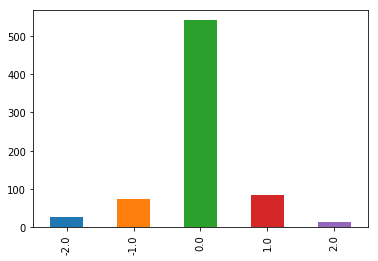

In [8]:
data['Label (-2 to 2)'].value_counts().sort_index().plot.bar()

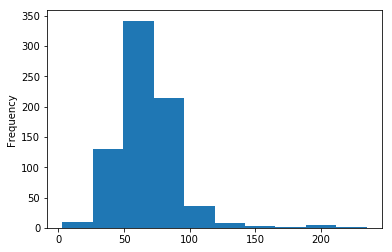

In [9]:
data['title'].str.len().plot.hist()

In [10]:
data.shape

(750, 17)

### Preprocessing

In [11]:
data.isnull().sum()

Unnamed: 0      0
Sr              0
author        128
timestamp       6
title           0
             ... 
preprocess      4
stem            6
lem             6
cap             6
UnixTime        6
Length: 17, dtype: int64

In [12]:
data.dropna(subset=['Label (-2 to 2)'], inplace=True)
data.isnull().sum()

Unnamed: 0      0
Sr              0
author        125
timestamp       3
title           0
             ... 
preprocess      3
stem            3
lem             3
cap             3
UnixTime        3
Length: 17, dtype: int64

data['text'] = data['text'].str.replace('@VirginAmerica', '')
data.head()

In [13]:
data['title'].apply(lambda x: x.lower()) #transform text to lowercase
data['title'] = data['title'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['title'].head()

0    Pot entrepreneurs target Asian money at Hong Kong investor forum  BNN Bloomberg
1                                Distributed Dialogues Political Censorship in China
2                           Sojourn SOJ Price Tops 023 on Exchanges  Daily Political
3    Happy birthday bitcoin 10 years on valuation is still a question  BNN Bloomberg
4               Coinbase valued at 8 billion in latest fundraising round  News  WIBQ
Name: title, dtype: object

Tokenizer from keras - 
maximum no. of rows = 5000
pad sequence = sentences of same length


In [15]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['title'].values)

X = tokenizer.texts_to_sequences(data['title'].values)
X = pad_sequences(X, maxlen = 200) # padding our text vector so they all have the same length
X[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [16]:
print(X.shape[1])

200


### Creating model

squential model is simplest 
model.add adds new layers to network
Dropout is used for regularization(decreasing overfitting)
256 - no. of units in each layer
Dense connection - every neuron of 1 layer connected to every other neuron of next layer

In [17]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

compiling - takes sets 2 things 
For adam it is 0.001, reach up to 85% accuracy in 5 epochs
1. optimizer - learning rate
2. loss function - log function

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 256)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 256)          525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 2,331,909
Trainable params: 2,331,909
Non-trainable params: 0
_________________________________________________________________


In [19]:
y = pd.get_dummies(data['Label (-2 to 2)']).values
print(y)
print(data['Label (-2 to 2)'])
# [print(data['label (-2 to 2)'][i], y[i]) for i in range(0,5)]

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]
0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
745    1.0
746   -1.0
747    1.0
748    0.0
749    0.0
Name: Label (-2 to 2), Length: 743, dtype: float64


training - 80%
testing - 20%

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
print(X.shape)
print(y.shape)

(743, 200)
(743, 5)


In [23]:
X_test.shape

(186, 200)

### Training model

Can include
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [24]:
batch_size = 32
epochs = 6

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/6
 - 65s - loss: 1.1005 - acc: 0.7038
Epoch 2/6
 - 70s - loss: 0.8198 - acc: 0.7235
Epoch 3/6
 - 70s - loss: 0.6205 - acc: 0.7576
Epoch 4/6
 - 72s - loss: 0.5085 - acc: 0.7935
Epoch 5/6
 - 71s - loss: 0.4563 - acc: 0.8079
Epoch 6/6
 - 70s - loss: 0.4148 - acc: 0.8474


Saving modelling using Pickle

In [26]:
with open('model_News_200', 'wb') as f: 
    pickle.dump(model, f)


In [23]:
with open('model_News', 'rb') as f:
    mp = pickle.load(f)

### Testing model

In [24]:
predictions = mp.predict(X_test)


# [print(data['step1'][i], predictions[i], y_test[i]) for i in range(0, 5)]

In [25]:
vpos_count, pos_count, neu_count, neg_count, vneg_count = 0, 0, 0, 0, 0 
real_vpos, real_pos, real_neu, real_neg, real_vneg = 0, 0, 0, 0, 0
for i, prediction in enumerate(predictions):
    
    if np.argmax(prediction) == 0:
        vpos_count += 1
    elif np.argmax(prediction) == 1:
        pos_count += 1
    elif np.argmax(prediction) == 2:
        neu_count += 1
    elif np.argmax(prediction) == 3:
        neg_count += 1
    else:
        vneg_count += 1
        
        
    
    if np.argmax(y_test[i]) == 0:
        real_vpos += 1
    elif np.argmax(y_test[i]) == 1:    
        real_pos += 1
    elif np.argmax(y_test[i]) == 2:    
        real_neu += 1
    elif np.argmax(y_test[i]) == 3:    
        real_neg += 1
    else:
        real_vneg +=1

print('Very_Positive predictions:', vpos_count)
print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Very_Negative predictions:', vneg_count)

print()
print('Real very_positive:', real_vpos)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)
print('Real very_negative:', real_vneg)

Very_Positive predictions: 0
Positive predictions: 0
Neutral predictions: 120
Negative predictions: 29
Very_Negative predictions: 0

Real very_positive: 5
Real positive: 14
Real neutral: 115
Real negative: 12
Real very_negative: 3


Total Wrong Predictions

In [26]:
sum = abs(vpos_count - real_vpos)
sum += abs(pos_count - real_pos)
sum += abs(neu_count - real_neu)
sum += abs(neg_count - real_neg)
sum += abs(vneg_count - real_vneg)
print(sum)

44


Total Error

In [27]:
print(sum/len(X_test)*100)

29.53020134228188
